# Práctica 2 parte 1

## Parámetros bellman ford

Se modifica la función del método de optimización para monitoreo de parámetros:

In [13]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import time

def bf_negative_cycle(graph, node_ini=None, distance_ini=np.inf):
    """
    Description
    -------
    Get the shortest path using the Bellman-Ford algorithm.
    Parameters
    -------
    G : Networkx DiGraph. The input graph.
    node_ini : Optional parameter, indicate begining node
    distance_ini : Deafault value is inf
    Returns
    -------
    list
        A list with the shortest path.
    """
    
    if node_ini is None:
        n_nodes = len(graph.nodes())
    else:
        n_nodes = node_ini
            
    n = len(graph.nodes()) + 1
    # Remove nan borders inside graph
    edges = []
    for edge in graph.edges().data():
        if ~np.isnan(edge[2]['weight']):
            edges.append(edge)

    # Add a start node and add zero weighted edges to all other nodes
    for i in range(n-1):
        edges.append((n-1, i, {'weight': 0}))

    # Initialize distances of nodes and predecessors
    distance= np.ones(n) * distance_ini # Starting distances with infinite values
    distance[n_nodes] = 0  # Starting node has zero distance
    predecessors = np.ones(n) * -1  # Starting predecessors with -1 values
    
    list_val=[]

    for i in range(n):  
        x = -1
        for edge in edges:
            if distance[int(edge[0])] + edge[2]['weight'] < distance[int(edge[1])]:                
                a = [distance[int(edge[0])] + edge[2]['weight'], distance[int(edge[1])],predecessors[int(edge[1])],int(edge[1])]
                list_val.append(a)
                distance[int(edge[1])] = distance[int(edge[0])] + edge[2]['weight']
                predecessors[int(edge[1])] = int(edge[0])
                x = int(edge[1])
        if x == -1:  # If relaxation is not possible, there is no negative cycle
            return None
        
    # Identify negative cycle
    for i in range(n):
        x = predecessors[int(x)]
    cycle = []
    v = x
    while True:
        cycle.append(int(v))
        if v == x and len(cycle) > 1:
            break
        v = predecessors[int(v)]
    
    cycle.reverse() # reverse list
    return cycle, list_val, predecessors

Parámetros encontrados:

- 1. Grafo dirigido
- 2. Número de vértices
- 3. Distancia o costo en los bordes del gráfico
- 4. Vertice inicial
- 5. Pasos de relajación
- 6. Mapa de predecesores que contiene los nodos del mínimo spanning tree.
- 7. Distancia mínima

Para este método se pueden optimizar los siguienes parámeros:

- 1. Vertice inicial
- 2. Distancia inicial

Se crean algunas funciones para el monitoreo:

In [91]:
def plot_grapg(grafo, title):
    """
    Recibe un grafo para graficar y el titulo del mismo
    :param: grafo, titulo
    :return: gráfico
    """
    pos = nx.spring_layout(grafo,k=8)

    nx.draw(grafo, pos, with_labels=True)
    nx.draw_networkx_edge_labels(grafo,
                                 pos,
                                 edge_labels={(u, v): d for u, v, d in grafo.edges(data="weight")},
                                 label_pos=.66)    
    plt.title(title)    
    plt.show()

def get_data_sol_seg_param(Grafo, node_ini=None, distance_ini=np.inf):
    """
    Recibe un grafo para analizar el comportamiento del método de bellman ford en su procesamiento
    :param: grafo
    :return: tablas reultado y gráficas, y parámetros a comparar
    """
    # Aplicando método Bellman ford modificado para monioreo de parámetros
    start_time = time.time()
    c,lv,p = bf_negative_cycle(Grafo, node_ini, distance_ini)
    time_exec = (time.time() - start_time)
    
    # Minim spanning tree
    print('Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: \n\n', p ,'\n\n')
    # Iteraciones, relajación de datos 
    print('Relajaciones, número de iteraciones: ',len(lv))
    # Solución
    print('Solución: ', c)
    # Relajaciones
    arr = np.array(lv)
    m = np.asmatrix(arr)
    print('Relajaciones realizadas: \n\n',m,'\n\n')
    # Separando datos a graficar
    act = np.array(m[:,0])
    ant = np.array(m[:,1])
    ni = map(str, np.array(m[:,2]).flatten().tolist())
    #print(ni)
    nf = map(str, np.array(m[:,3]).flatten().tolist())
    nodes_rel = np.array([','.join(p) for p in zip(ni, nf)])
    #print(nodes_rel)
    
    relajacion_graph(ant,act,nodes_rel)
    relajacion_global(ant,act)
    actualizacion_ruta(np.array(m[:,2]),np.array(m[:,3]))   
    
    return time_exec
    
    
def relajacion_graph(ant,act,nodes_rel):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    
    # Nodos
    x = list(range(1, len(nodes_rel)))
    y2 = act
    y1 = ant

    x = range(100)
    y = range(100,200)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_title('Relajación de datos')
    ax1.set_xlabel('Edges')
    ax1.set_ylabel('Relajación de datos')

    ax1.scatter(nodes_rel, y1, s=10, c='b', marker="s", label='Valor inicial')
    ax1.scatter(nodes_rel, y2, s=10, c='r', marker="o", label='Valor actualizado')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 90) 
    plt.show()

    
def relajacion_global(ant,act):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    y2 = act
    y1 = ant
    plt.plot(y1, y2)
 
    # naming the x axis
    plt.xlabel('Valor Inicial')
    # naming the y axis
    plt.ylabel('Valor Actuakizado')

    plt.title('Actualización de datos (relajación global)')

    # function to show the plot
    plt.show()
    
def actualizacion_ruta(x,y):
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Nodo origen')
    # naming the y axis
    plt.ylabel('Nodo destino')

    # giving a title to my graph
    plt.title('Actualización de la ruta')

    # function to show the plot
    plt.show()   
    
def compare_complex(x, complejidad, tiempo):
    """
    Gráfica el comportamiento tiempo de ejecución corriendo el método de bellman ford 
    y complejidad de los grafos
    :param: número de nodos del grafo, coplejidad de cada grafo, tiempo de ejecución bellman ford
    :return: gráfica del comportamiento
    """
    print(x)
    fig = plt.figure()
    #sns.set_style('white')
    ax1 = fig.add_subplot(111)
    g1, = ax1.plot(x, tiempo)
    ax1.set_ylabel('Tiempo')
    ax1.set_title("Tiempo ejecución Bellman Ford vs Complejidad")
    ax1.set_xlabel('Nodos')

    ax2 = ax1.twinx()  # this is the important function
    g2, = ax2.plot(x, complejidad, 'r')
    ax2.set_xlim([0, np.e])
    ax2.set_ylabel('Complejidad')
    
    plt.legend([g1, g2],["Tiempo", "Complejidad"])
    plt.xticks(range(1, 15))
    plt.xlabel("Número de Nodos", fontsize=12)

    plt.show()

Inicializando ejemplos de redes a analizar:

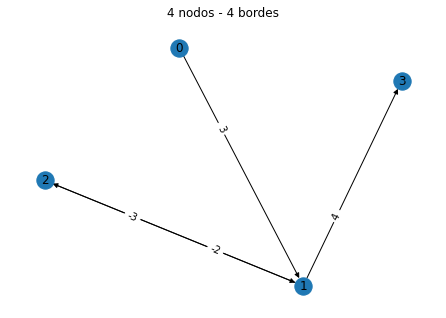

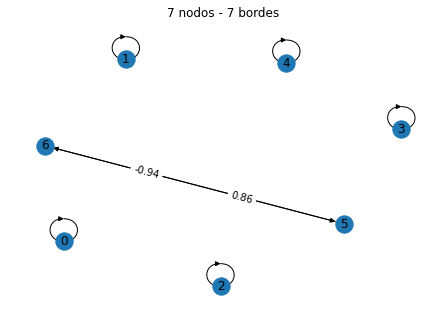

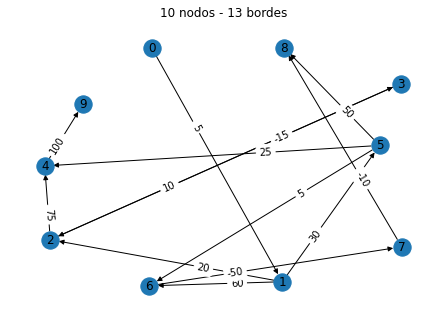

In [8]:
# 4 nodos - 4 bordes
edges1 = [["0","1", 3],
         ["1","2", -2],
         ["2","1", -3],
         ["1","3", 4]]
     
G1 = nx.DiGraph()        
G1.add_weighted_edges_from(edges1)

plot_grapg(G1,'4 nodos - 4 bordes')

# 7 nodos - 7 bordes
edges2 = [["5","6", 0.86],
         ["6","5", -0.94],
         ["3","3",0],
         ["0","0",0],
         ["1","1",0],
         ["2","2",0],
         ["4","4",0]]
        
G2 = nx.DiGraph()        
G2.add_weighted_edges_from(edges2)

plot_grapg(G2,'7 nodos - 7 bordes')

# Ref: https://medium.com/analytics-vidhya/the-bellman-ford-algorithm-a0801afc333f
# 10 nodos - 13 bordes
edges3 = [["0","1", 5],
         ["1","2", 20],
         ["1","5", 30],
         ["1","6", 60],
         ["2","3", 10],
         ["2","4", 75],
         ["3","2", -15],
         ["4","9", 100],
         ["5","4", 25],
         ["5","6", 5],
         ["5","8", 50],
         ["6","7", -50],
         ["7","8", -10]]
        
G3 = nx.DiGraph()        
G3.add_weighted_edges_from(edges3)

plot_grapg(G3,'10 nodos - 13 bordes')

### **Monitoreo con parámetro default: `edge ini = último nodo, distancia inicial = infinito`**

#### **Grafo 1**

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 4.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  15
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[  0.  inf  -1.   0.]
 [  0.  inf  -1.   1.]
 [  0.  inf  -1.   2.]
 [  0.  inf  -1.   3.]
 [ -2.   0.   4.   2.]
 [ -5.   0.   4.   1.]
 [ -7.  -2.   1.   2.]
 [ -1.   0.   4.   3.]
 [-10.  -5.   2.   1.]
 [-12.  -7.   1.   2.]
 [ -6.  -1.   1.   3.]
 [-15. -10.   2.   1.]
 [-17. -12.   1.   2.]
 [-11.  -6.   1.   3.]
 [-20. -15.   2.   1.]] 




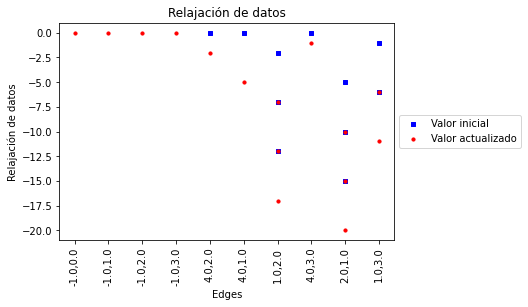

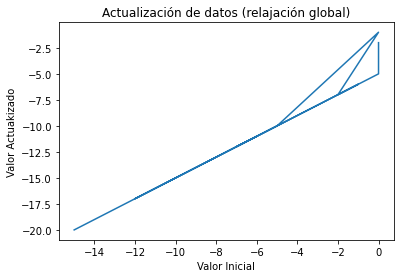

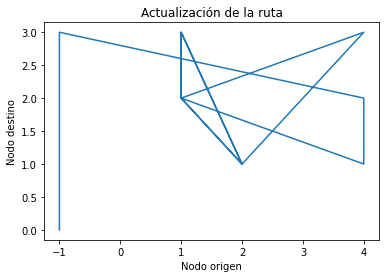

In [15]:
time1 = get_data_sol_seg_param(G1)

#### **Grafo 2**

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 7.  7.  7.  7.  7.  6.  5. -1.] 


Relajaciones, número de iteraciones:  20
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 0.     inf -1.    0.  ]
 [ 0.     inf -1.    1.  ]
 [ 0.     inf -1.    2.  ]
 [ 0.     inf -1.    3.  ]
 [ 0.     inf -1.    4.  ]
 [ 0.     inf -1.    5.  ]
 [ 0.     inf -1.    6.  ]
 [-0.94  0.    7.    5.  ]
 [-0.08  0.    7.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]] 




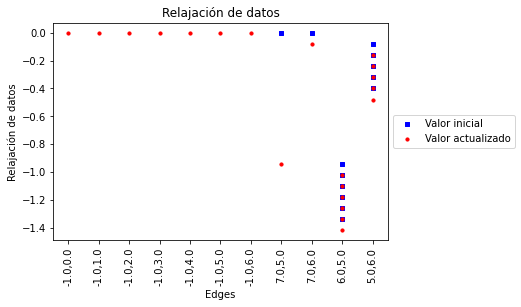

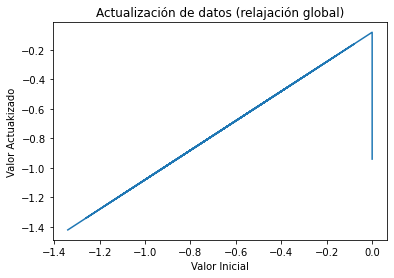

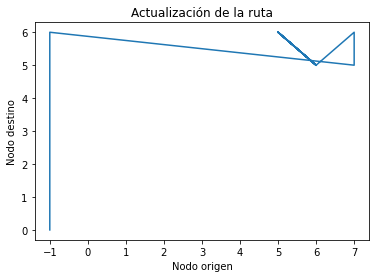

In [16]:
time2 = get_data_sol_seg_param(G2)

#### **Grafo 3**

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [10. 10.  3.  2. 10. 10. 10.  6.  7. 10. -1.] 


Relajaciones, número de iteraciones:  31
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[  0.  inf  -1.   0.]
 [  0.  inf  -1.   1.]
 [  0.  inf  -1.   2.]
 [  0.  inf  -1.   3.]
 [  0.  inf  -1.   4.]
 [  0.  inf  -1.   5.]
 [  0.  inf  -1.   6.]
 [  0.  inf  -1.   7.]
 [  0.  inf  -1.   8.]
 [  0.  inf  -1.   9.]
 [-50.   0.  10.   7.]
 [-15.   0.  10.   2.]
 [-60.   0.  10.   8.]
 [ -5.   0.  10.   3.]
 [-20. -15.   3.   2.]
 [-10.  -5.   2.   3.]
 [-25. -20.   3.   2.]
 [-15. -10.   2.   3.]
 [-30. -25.   3.   2.]
 [-20. -15.   2.   3.]
 [-35. -30.   3.   2.]
 [-25. -20.   2.   3.]
 [-40. -35.   3.   2.]
 [-30. -25.   2.   3.]
 [-45. -40.   3.   2.]
 [-35. -30.   2.   3.]
 [-50. -45.   3.   2.]
 [-40. -35.   2.   3.]
 [-55. -50.   3.   2.]
 [-45. -40.   2.   3.]
 [-60. -55.   3.   2.]] 




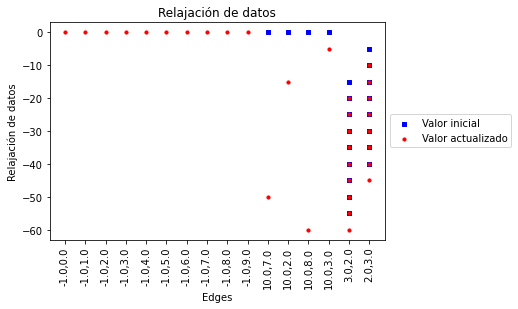

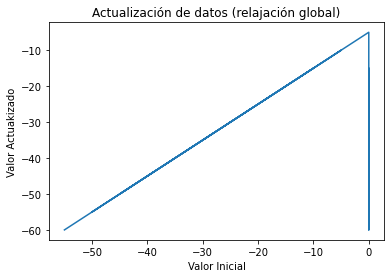

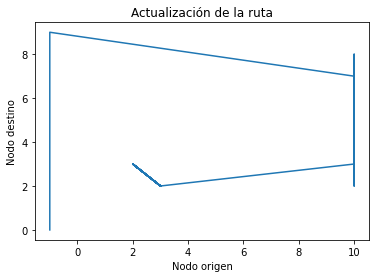

In [17]:
time3 = get_data_sol_seg_param(G3)

Midiendo tiempo de ejecución y complejidad de acuerdo a la siguiene fórmula:

$$O(E V) = O(|V|^2) * O(|V|) = O(V^3)$$

Referencia: [An Analysis of Bellman-Ford and Dijkstra’s Algorith](https://melitadsouza.github.io/pdf/algos.pdf)

Se compara el tiempo de ejecución del método de *bellman ford* y su complejidad de cada grafo, usando en el eje x su número de nodos:

[4, 7, 13]


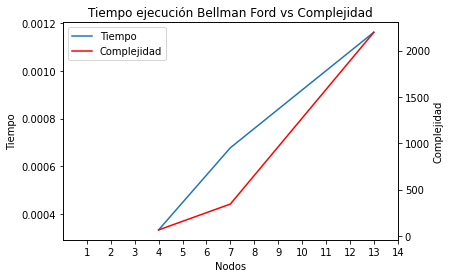

In [92]:
edges_number = np.array([G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()])
times =  np.array([time1, time2, time3])
complex_g = np.array([G1.number_of_edges()**3,G2.number_of_edges()**3,G3.number_of_edges()**3])
compare_complex(edges_number.tolist(),complex_g, times)

### **Monitoreo con cambio de nodo inicial y distancia inicial = infinito**

- ***Ejemplo 1, grafo 1***

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  16
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[  3.  inf  -1.   1.]
 [  1.  inf  -1.   2.]
 [  7.  inf  -1.   3.]
 [ -2.   3.   0.   1.]
 [ -4.   1.   1.   2.]
 [  2.   7.   1.   3.]
 [ -7.  -2.   2.   1.]
 [ -9.  -4.   1.   2.]
 [ -3.   2.   1.   3.]
 [-12.  -7.   2.   1.]
 [-14.  -9.   1.   2.]
 [ -8.  -3.   1.   3.]
 [-17. -12.   2.   1.]
 [-19. -14.   1.   2.]
 [-13.  -8.   1.   3.]
 [-22. -17.   2.   1.]] 




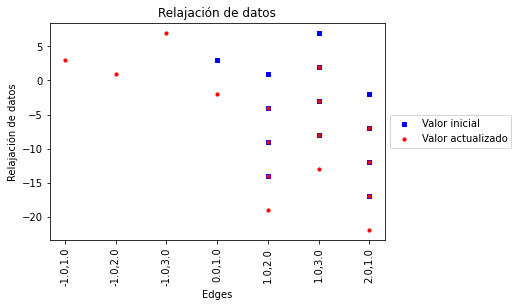

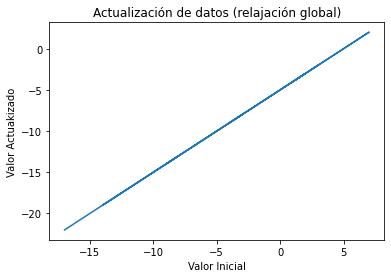

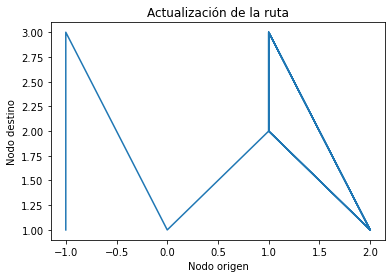

In [26]:
# Inicio en nodo 0
get_data_sol_seg_param(G1,0)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  15
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[ -2.  inf  -1.   2.]
 [  4.  inf  -1.   3.]
 [ -5.   0.  -1.   1.]
 [ -7.  -2.   1.   2.]
 [ -1.   4.   1.   3.]
 [-10.  -5.   2.   1.]
 [-12.  -7.   1.   2.]
 [ -6.  -1.   1.   3.]
 [-15. -10.   2.   1.]
 [-17. -12.   1.   2.]
 [-11.  -6.   1.   3.]
 [-20. -15.   2.   1.]
 [-22. -17.   1.   2.]
 [-16. -11.   1.   3.]
 [-25. -20.   2.   1.]] 




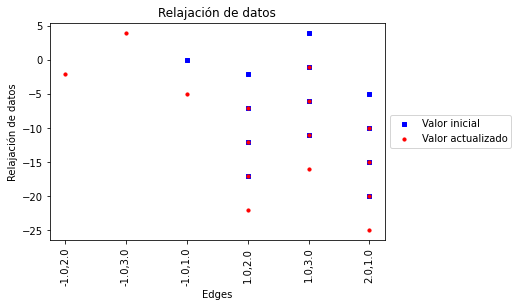

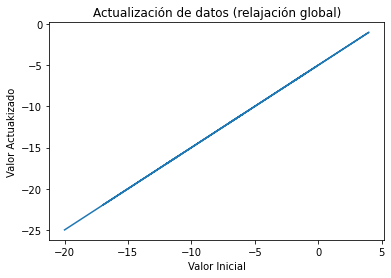

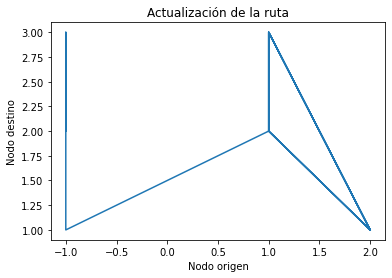

In [27]:
# Inicio en nodo 1
get_data_sol_seg_param(G1,1)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  13
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[ -3.  inf  -1.   1.]
 [ -5.   0.  -1.   2.]
 [  1.  inf  -1.   3.]
 [ -8.  -3.   2.   1.]
 [-10.  -5.   1.   2.]
 [ -4.   1.   1.   3.]
 [-13.  -8.   2.   1.]
 [-15. -10.   1.   2.]
 [ -9.  -4.   1.   3.]
 [-18. -13.   2.   1.]
 [-20. -15.   1.   2.]
 [-14.  -9.   1.   3.]
 [-23. -18.   2.   1.]] 




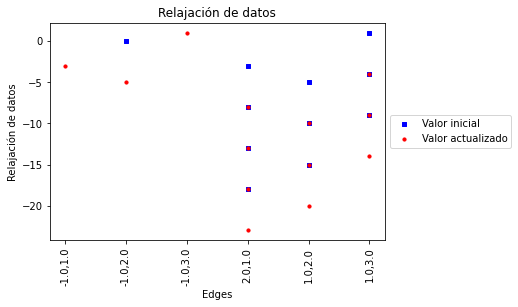

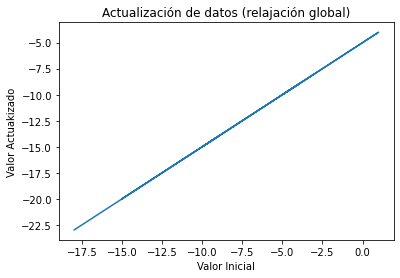

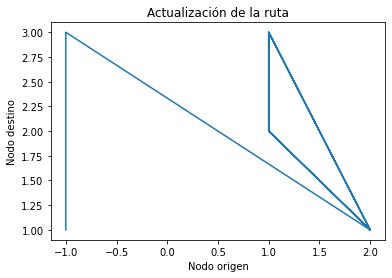

In [28]:
# Inicio en nodo 2
get_data_sol_seg_param(G1,2)

- ***Ejemplo 2, grafo 2***

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1. -1. -1. -1. -1.  6.  5. -1.] 


Relajaciones, número de iteraciones:  16
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 0.86   inf -1.    6.  ]
 [-0.08  0.   -1.    5.  ]
 [ 0.78  0.86  5.    6.  ]
 [-0.16 -0.08  6.    5.  ]
 [ 0.7   0.78  5.    6.  ]
 [-0.24 -0.16  6.    5.  ]
 [ 0.62  0.7   5.    6.  ]
 [-0.32 -0.24  6.    5.  ]
 [ 0.54  0.62  5.    6.  ]
 [-0.4  -0.32  6.    5.  ]
 [ 0.46  0.54  5.    6.  ]
 [-0.48 -0.4   6.    5.  ]
 [ 0.38  0.46  5.    6.  ]
 [-0.56 -0.48  6.    5.  ]
 [ 0.3   0.38  5.    6.  ]
 [-0.64 -0.56  6.    5.  ]] 




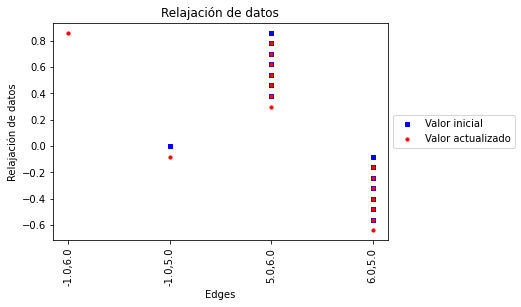

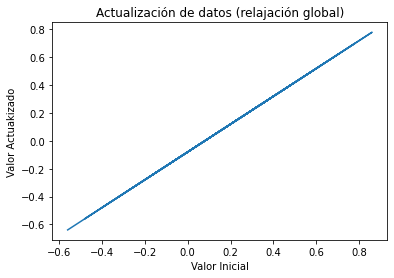

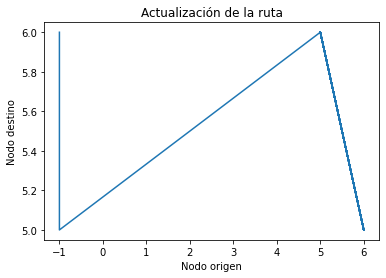

In [24]:
# Inicio en nodo 5
get_data_sol_seg_param(G2,5)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1. -1. -1. -1. -1.  6.  5. -1.] 


Relajaciones, número de iteraciones:  15
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[-0.94   inf -1.    5.  ]
 [-0.08  0.   -1.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]
 [-0.56 -0.48  5.    6.  ]
 [-1.5  -1.42  6.    5.  ]] 




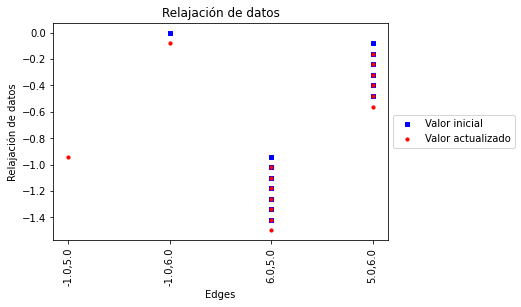

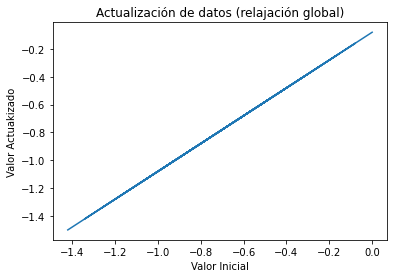

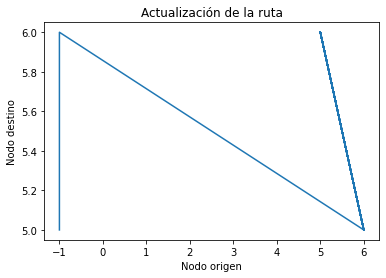

In [25]:
# Inicio en nodo 6
get_data_sol_seg_param(G2,6)

- ***Ejemplo 3, grafo 3***

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1.  0.  3.  2.  2.  1.  5.  6.  7.  4. -1.] 


Relajaciones, número de iteraciones:  37
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[  5.  inf  -1.   1.]
 [ 25.  inf  -1.   2.]
 [ 35.  inf  -1.   5.]
 [ 65.  inf  -1.   6.]
 [ 35.  inf  -1.   3.]
 [100.  inf  -1.   4.]
 [ 60. 100.   2.   4.]
 [ 40.  65.   1.   6.]
 [ 85.  inf  -1.   8.]
 [-10.  inf  -1.   7.]
 [ 20.  25.   1.   2.]
 [160.  inf  -1.   9.]
 [-20.  85.   5.   8.]
 [ 30.  35.   2.   3.]
 [ 15.  20.   3.   2.]
 [ 25.  30.   2.   3.]
 [ 10.  15.   3.   2.]
 [ 20.  25.   2.   3.]
 [  5.  10.   3.   2.]
 [ 15.  20.   2.   3.]
 [  0.   5.   3.   2.]
 [ 10.  15.   2.   3.]
 [ -5.   0.   3.   2.]
 [  5.  10.   2.   3.]
 [-10.  -5.   3.   2.]
 [  0.   5.   2.   3.]
 [-15. -10.   3.   2.]
 [ -5.   0.   2.   3.]
 [-20. -15.   3.   2.]
 [-10.  -5.   2.   3.]
 [ 55.  60.   5.   4.]
 [-25. -20.   3.   2.]
 [155. 160.   4.   9.]
 [-15. -10.   2.

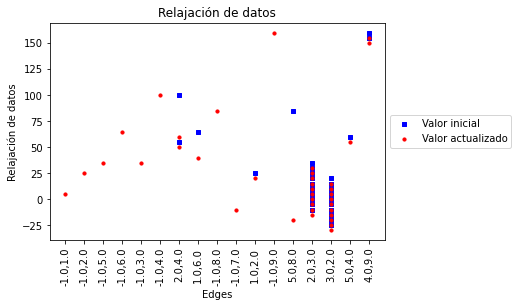

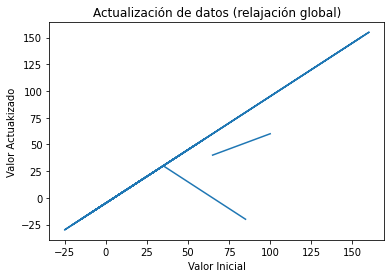

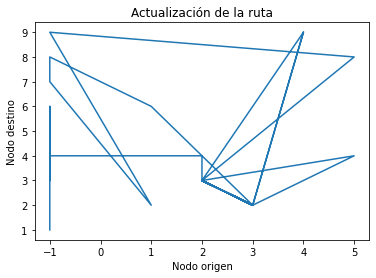

In [29]:
# Inicio en nodo 0
get_data_sol_seg_param(G3,0)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1. -1.  3.  2.  2. -1. -1. -1. -1.  4. -1.] 


Relajaciones, número de iteraciones:  44
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[ 10.  inf  -1.   3.]
 [ 75.  inf  -1.   4.]
 [ -5.   0.  -1.   2.]
 [175.  inf  -1.   9.]
 [  5.  10.   2.   3.]
 [ 70.  75.   2.   4.]
 [-10.  -5.   3.   2.]
 [170. 175.   4.   9.]
 [  0.   5.   2.   3.]
 [ 65.  70.   2.   4.]
 [-15. -10.   3.   2.]
 [165. 170.   4.   9.]
 [ -5.   0.   2.   3.]
 [ 60.  65.   2.   4.]
 [-20. -15.   3.   2.]
 [160. 165.   4.   9.]
 [-10.  -5.   2.   3.]
 [ 55.  60.   2.   4.]
 [-25. -20.   3.   2.]
 [155. 160.   4.   9.]
 [-15. -10.   2.   3.]
 [ 50.  55.   2.   4.]
 [-30. -25.   3.   2.]
 [150. 155.   4.   9.]
 [-20. -15.   2.   3.]
 [ 45.  50.   2.   4.]
 [-35. -30.   3.   2.]
 [145. 150.   4.   9.]
 [-25. -20.   2.   3.]
 [ 40.  45.   2.   4.]
 [-40. -35.   3.   2.]
 [140. 145.   4.   9.]
 [-30. -25.   2.   3.]
 [ 35.  40.   2.

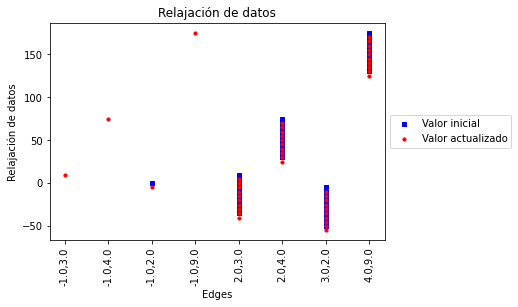

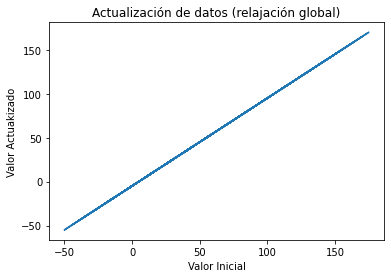

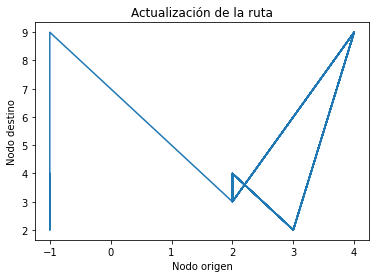

In [35]:
# Inicio en nodo 2
get_data_sol_seg_param(G3,2)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1. -1.  3.  2.  2. -1. -1. -1. -1.  4. -1.] 


Relajaciones, número de iteraciones:  41
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[-15.  inf  -1.   2.]
 [ -5.   0.  -1.   3.]
 [ 60.  inf  -1.   4.]
 [-20. -15.   3.   2.]
 [160.  inf  -1.   9.]
 [-10.  -5.   2.   3.]
 [ 55.  60.   2.   4.]
 [-25. -20.   3.   2.]
 [155. 160.   4.   9.]
 [-15. -10.   2.   3.]
 [ 50.  55.   2.   4.]
 [-30. -25.   3.   2.]
 [150. 155.   4.   9.]
 [-20. -15.   2.   3.]
 [ 45.  50.   2.   4.]
 [-35. -30.   3.   2.]
 [145. 150.   4.   9.]
 [-25. -20.   2.   3.]
 [ 40.  45.   2.   4.]
 [-40. -35.   3.   2.]
 [140. 145.   4.   9.]
 [-30. -25.   2.   3.]
 [ 35.  40.   2.   4.]
 [-45. -40.   3.   2.]
 [135. 140.   4.   9.]
 [-35. -30.   2.   3.]
 [ 30.  35.   2.   4.]
 [-50. -45.   3.   2.]
 [130. 135.   4.   9.]
 [-40. -35.   2.   3.]
 [ 25.  30.   2.   4.]
 [-55. -50.   3.   2.]
 [125. 130.   4.   9.]
 [-45. -40.   2.

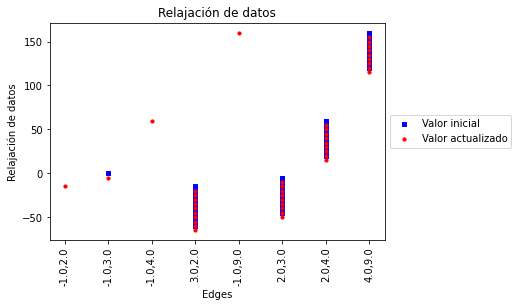

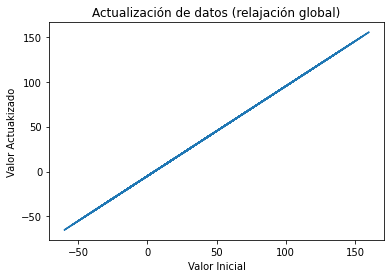

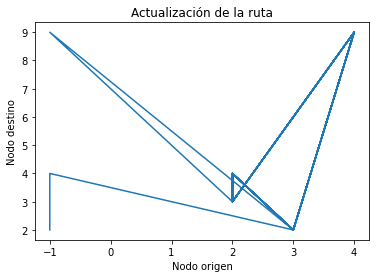

In [36]:
# Inicio en nodo 3
get_data_sol_seg_param(G3,3)

### **Monitoreo con parámetro default: `edge ini = último nodo, distancia inicial = variante`**

- ***Ejemplo 1, grafo 1***

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 4.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  15
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[ -1.   1.  -1.   2.]
 [ -4.   1.  -1.   1.]
 [  0.   1.  -1.   0.]
 [  0.   1.  -1.   3.]
 [ -6.  -1.   1.   2.]
 [ -9.  -4.   2.   1.]
 [-11.  -6.   1.   2.]
 [ -5.   0.   4.   3.]
 [-14.  -9.   2.   1.]
 [-16. -11.   1.   2.]
 [-10.  -5.   1.   3.]
 [-19. -14.   2.   1.]
 [-21. -16.   1.   2.]
 [-15. -10.   1.   3.]
 [-24. -19.   2.   1.]] 




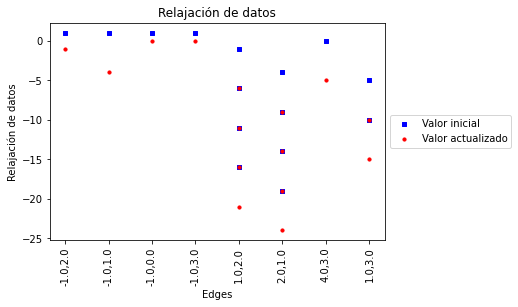

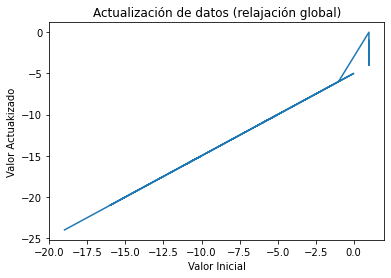

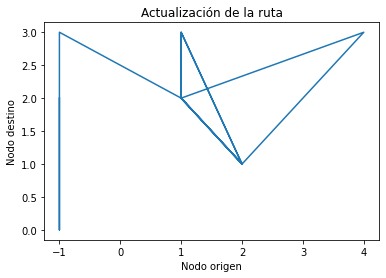

In [40]:
# Distancia 1
get_data_sol_seg_param(G1,None,1)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 4.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  17
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[ 98. 100.  -1.   2.]
 [ 95. 100.  -1.   1.]
 [  0. 100.  -1.   0.]
 [  0.  95.   2.   1.]
 [  0.  98.   1.   2.]
 [  0. 100.  -1.   3.]
 [ -2.   0.   4.   2.]
 [ -5.   0.   4.   1.]
 [ -7.  -2.   1.   2.]
 [ -1.   0.   4.   3.]
 [-10.  -5.   2.   1.]
 [-12.  -7.   1.   2.]
 [ -6.  -1.   1.   3.]
 [-15. -10.   2.   1.]
 [-17. -12.   1.   2.]
 [-11.  -6.   1.   3.]
 [-20. -15.   2.   1.]] 




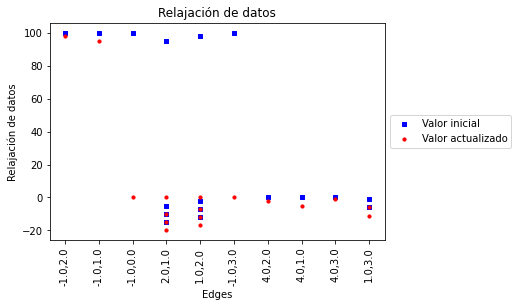

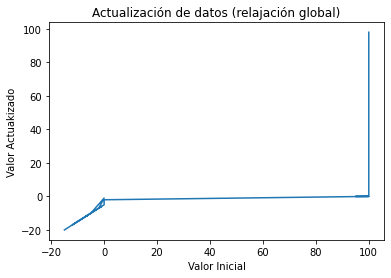

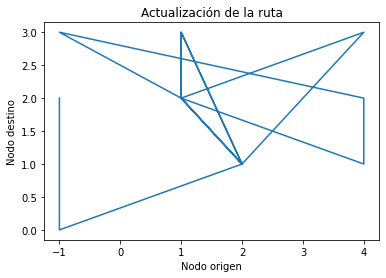

In [41]:
# Distancia 100
get_data_sol_seg_param(G1,None,100)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 4.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  17
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[ 998. 1000.   -1.    2.]
 [ 995. 1000.   -1.    1.]
 [   0. 1000.   -1.    0.]
 [   0.  995.    2.    1.]
 [   0.  998.    1.    2.]
 [   0. 1000.   -1.    3.]
 [  -2.    0.    4.    2.]
 [  -5.    0.    4.    1.]
 [  -7.   -2.    1.    2.]
 [  -1.    0.    4.    3.]
 [ -10.   -5.    2.    1.]
 [ -12.   -7.    1.    2.]
 [  -6.   -1.    1.    3.]
 [ -15.  -10.    2.    1.]
 [ -17.  -12.    1.    2.]
 [ -11.   -6.    1.    3.]
 [ -20.  -15.    2.    1.]] 




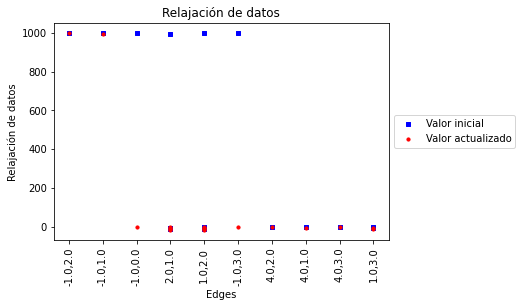

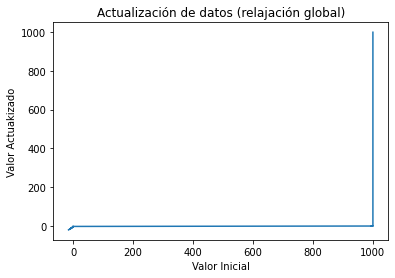

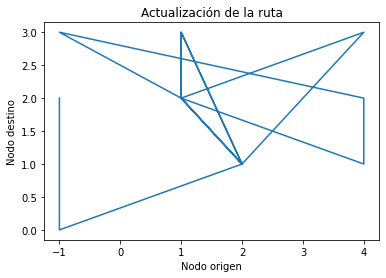

In [42]:
# Distancia 1000
get_data_sol_seg_param(G1,None,1000)

- ***Ejemplo 2, grafo 2***

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 7.  7.  7.  7.  7.  6.  5. -1.] 


Relajaciones, número de iteraciones:  21
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 0.06  1.   -1.    5.  ]
 [ 0.    1.   -1.    0.  ]
 [ 0.    1.   -1.    1.  ]
 [ 0.    1.   -1.    2.  ]
 [ 0.    1.   -1.    3.  ]
 [ 0.    1.   -1.    4.  ]
 [ 0.    0.06  6.    5.  ]
 [ 0.    1.   -1.    6.  ]
 [-0.94  0.    7.    5.  ]
 [-0.08  0.    7.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]] 




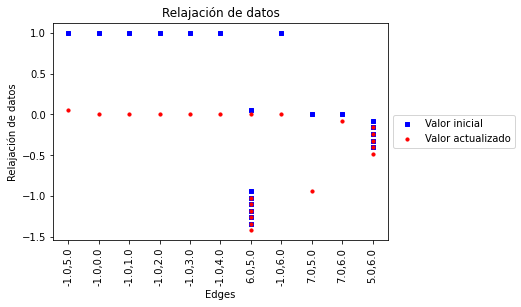

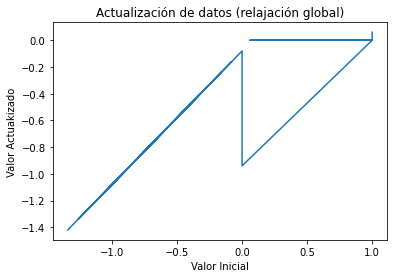

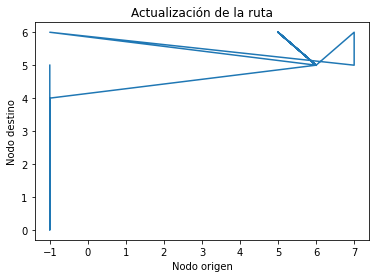

In [44]:
# Distancia 1
get_data_sol_seg_param(G2,None,1)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 7.  7.  7.  7.  7.  6.  5. -1.] 


Relajaciones, número de iteraciones:  21
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 9.906e+01  1.000e+02 -1.000e+00  5.000e+00]
 [ 0.000e+00  1.000e+02 -1.000e+00  0.000e+00]
 [ 0.000e+00  1.000e+02 -1.000e+00  1.000e+00]
 [ 0.000e+00  1.000e+02 -1.000e+00  2.000e+00]
 [ 0.000e+00  1.000e+02 -1.000e+00  3.000e+00]
 [ 0.000e+00  1.000e+02 -1.000e+00  4.000e+00]
 [ 0.000e+00  9.906e+01  6.000e+00  5.000e+00]
 [ 0.000e+00  1.000e+02 -1.000e+00  6.000e+00]
 [-9.400e-01  0.000e+00  7.000e+00  5.000e+00]
 [-8.000e-02  0.000e+00  7.000e+00  6.000e+00]
 [-1.020e+00 -9.400e-01  6.000e+00  5.000e+00]
 [-1.600e-01 -8.000e-02  5.000e+00  6.000e+00]
 [-1.100e+00 -1.020e+00  6.000e+00  5.000e+00]
 [-2.400e-01 -1.600e-01  5.000e+00  6.000e+00]
 [-1.180e+00 -1.100e+00  6.000e+00  5.000e+00]
 [-3.200e-01 -2.400e-01  5.000e+00  6.000e+00]
 [-1.260e+00 -1.180e+00  6.000e+00 

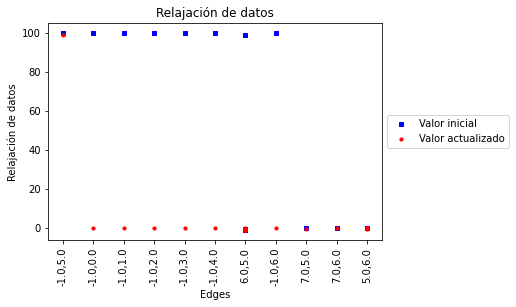

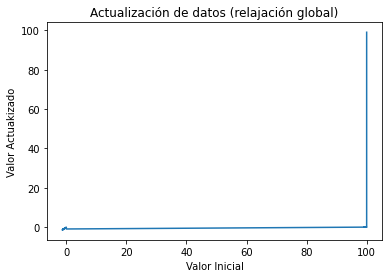

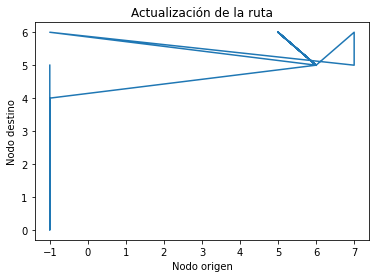

In [48]:
# Distancia 10
get_data_sol_seg_param(G2,None,100)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 7.  7.  7.  7.  7.  6.  5. -1.] 


Relajaciones, número de iteraciones:  21
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 9.9906e+02  1.0000e+03 -1.0000e+00  5.0000e+00]
 [ 0.0000e+00  1.0000e+03 -1.0000e+00  0.0000e+00]
 [ 0.0000e+00  1.0000e+03 -1.0000e+00  1.0000e+00]
 [ 0.0000e+00  1.0000e+03 -1.0000e+00  2.0000e+00]
 [ 0.0000e+00  1.0000e+03 -1.0000e+00  3.0000e+00]
 [ 0.0000e+00  1.0000e+03 -1.0000e+00  4.0000e+00]
 [ 0.0000e+00  9.9906e+02  6.0000e+00  5.0000e+00]
 [ 0.0000e+00  1.0000e+03 -1.0000e+00  6.0000e+00]
 [-9.4000e-01  0.0000e+00  7.0000e+00  5.0000e+00]
 [-8.0000e-02  0.0000e+00  7.0000e+00  6.0000e+00]
 [-1.0200e+00 -9.4000e-01  6.0000e+00  5.0000e+00]
 [-1.6000e-01 -8.0000e-02  5.0000e+00  6.0000e+00]
 [-1.1000e+00 -1.0200e+00  6.0000e+00  5.0000e+00]
 [-2.4000e-01 -1.6000e-01  5.0000e+00  6.0000e+00]
 [-1.1800e+00 -1.1000e+00  6.0000e+00  5.0000e+00]
 [-3.2000e-01 -2.4000e

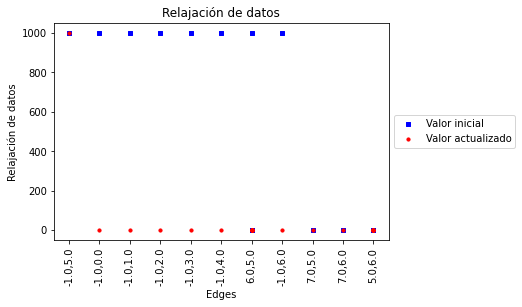

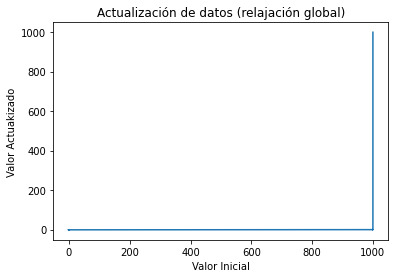

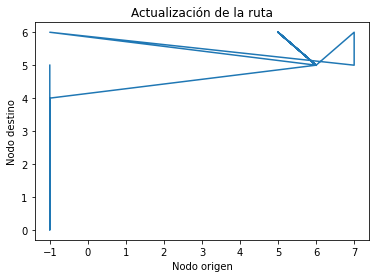

In [49]:
# Distancia 1000
get_data_sol_seg_param(G2,None,1000)

- ***Ejemplo 3, grafo 3***

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [10. 10.  3.  2. 10. 10. 10.  6.  7. 10. -1.] 


Relajaciones, número de iteraciones:  32
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[-49.   1.  -1.   7.]
 [-14.   1.  -1.   2.]
 [-59.   1.  -1.   8.]
 [  0.   1.  -1.   0.]
 [  0.   1.  -1.   1.]
 [  0.   1.  -1.   3.]
 [  0.   1.  -1.   4.]
 [  0.   1.  -1.   5.]
 [  0.   1.  -1.   6.]
 [  0.   1.  -1.   9.]
 [ -4.   0.  10.   3.]
 [-50. -49.   6.   7.]
 [-19. -14.   3.   2.]
 [-60. -59.   7.   8.]
 [ -9.  -4.   2.   3.]
 [-24. -19.   3.   2.]
 [-14.  -9.   2.   3.]
 [-29. -24.   3.   2.]
 [-19. -14.   2.   3.]
 [-34. -29.   3.   2.]
 [-24. -19.   2.   3.]
 [-39. -34.   3.   2.]
 [-29. -24.   2.   3.]
 [-44. -39.   3.   2.]
 [-34. -29.   2.   3.]
 [-49. -44.   3.   2.]
 [-39. -34.   2.   3.]
 [-54. -49.   3.   2.]
 [-44. -39.   2.   3.]
 [-59. -54.   3.   2.]
 [-49. -44.   2.   3.]
 [-64. -59.   3.   2.]] 




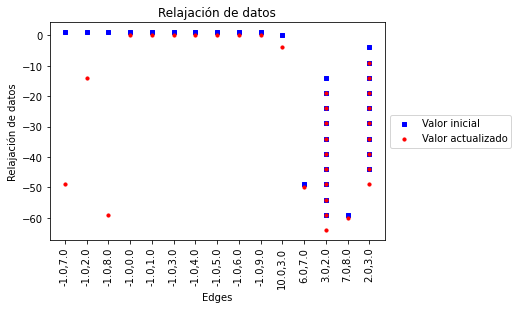

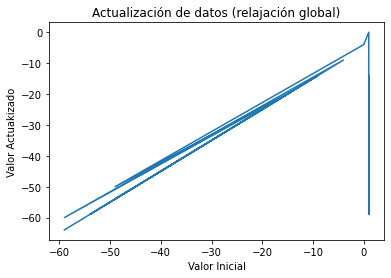

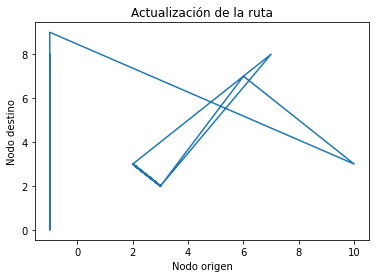

In [50]:
# Distancia 1
get_data_sol_seg_param(G3,None,1)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [10. 10.  3.  2. 10. 10. 10.  6.  7. 10. -1.] 


Relajaciones, número de iteraciones:  34
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[ 50. 100.  -1.   7.]
 [ 85. 100.  -1.   2.]
 [ 40. 100.  -1.   8.]
 [  0. 100.  -1.   0.]
 [  0. 100.  -1.   1.]
 [  0.  85.   3.   2.]
 [  0. 100.  -1.   3.]
 [  0. 100.  -1.   4.]
 [  0. 100.  -1.   5.]
 [  0. 100.  -1.   6.]
 [  0.  50.   6.   7.]
 [  0.  40.   7.   8.]
 [  0. 100.  -1.   9.]
 [-50.   0.  10.   7.]
 [-15.   0.  10.   2.]
 [-60.   0.  10.   8.]
 [ -5.   0.  10.   3.]
 [-20. -15.   3.   2.]
 [-10.  -5.   2.   3.]
 [-25. -20.   3.   2.]
 [-15. -10.   2.   3.]
 [-30. -25.   3.   2.]
 [-20. -15.   2.   3.]
 [-35. -30.   3.   2.]
 [-25. -20.   2.   3.]
 [-40. -35.   3.   2.]
 [-30. -25.   2.   3.]
 [-45. -40.   3.   2.]
 [-35. -30.   2.   3.]
 [-50. -45.   3.   2.]
 [-40. -35.   2.   3.]
 [-55. -50.   3.   2.]
 [-45. -40.   2.   3.]
 [-60. -55.   3.

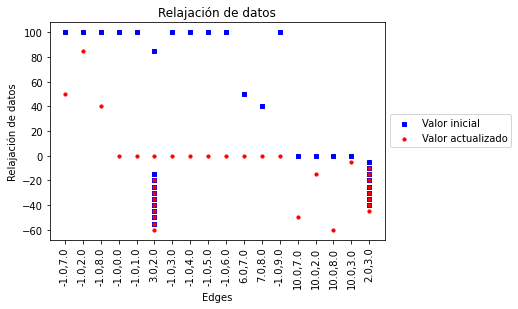

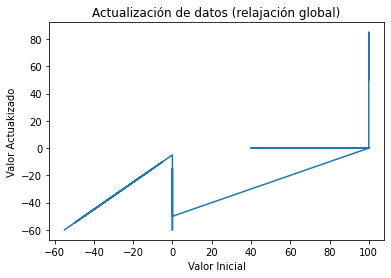

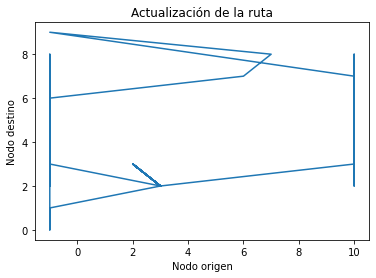

In [52]:
# Distancia 100
get_data_sol_seg_param(G3,None,100)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [10. 10.  3.  2. 10. 10. 10.  6.  7. 10. -1.] 


Relajaciones, número de iteraciones:  34
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[ 950. 1000.   -1.    7.]
 [ 985. 1000.   -1.    2.]
 [ 940. 1000.   -1.    8.]
 [   0. 1000.   -1.    0.]
 [   0. 1000.   -1.    1.]
 [   0.  985.    3.    2.]
 [   0. 1000.   -1.    3.]
 [   0. 1000.   -1.    4.]
 [   0. 1000.   -1.    5.]
 [   0. 1000.   -1.    6.]
 [   0.  950.    6.    7.]
 [   0.  940.    7.    8.]
 [   0. 1000.   -1.    9.]
 [ -50.    0.   10.    7.]
 [ -15.    0.   10.    2.]
 [ -60.    0.   10.    8.]
 [  -5.    0.   10.    3.]
 [ -20.  -15.    3.    2.]
 [ -10.   -5.    2.    3.]
 [ -25.  -20.    3.    2.]
 [ -15.  -10.    2.    3.]
 [ -30.  -25.    3.    2.]
 [ -20.  -15.    2.    3.]
 [ -35.  -30.    3.    2.]
 [ -25.  -20.    2.    3.]
 [ -40.  -35.    3.    2.]
 [ -30.  -25.    2.    3.]
 [ -45.  -40.    3.    2.]
 [ -35.  -30.    2.

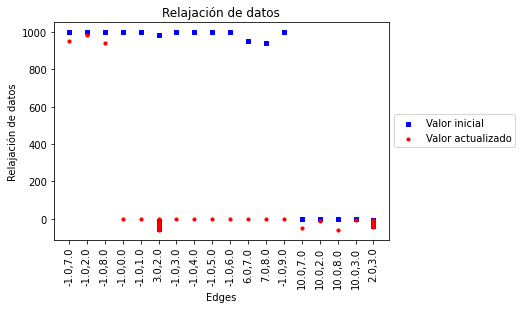

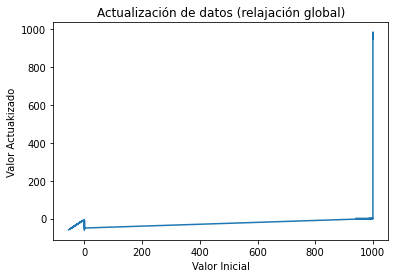

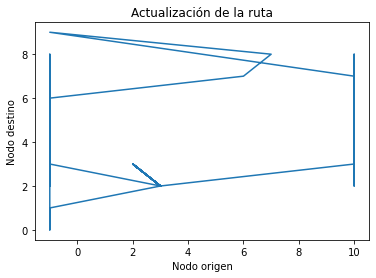

In [53]:
# Distancia 1000
get_data_sol_seg_param(G3,None,1000)

### **Referencias:**

**<sup>(1)</sup>** [Bellman-Ford Algorithm](https://www.sciencedirect.com/topics/computer-science/bellman-ford-algorithm).

**<sup>(2)</sup>** [bellman_ford_shortest_paths](https://www.boost.org/doc/libs/1_62_0/libs/graph/doc/bellman_ford_shortest.html)

**<sup>(3)</sup>** [An Analysis of Bellman-Ford and Dijkstra’s Algorithm](https://melitadsouza.github.io/pdf/algos.pdf)